# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('new_appdata10.csv')

# Data Pre-Processing

In [3]:
# Splitting Independent and Response Variables
response = dataset["enrolled"]
dataset = dataset.drop(columns="enrolled")

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = 0.2, random_state = 0)

In [5]:
# Removing Identifiers
train_identity = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [7]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [8]:
X_train.columns.values

array(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen', 'Splash',
       'RewardsContainer', 'EditProfile', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards',
       'AccountView', 'VerifyAnnualIncome', 'VerifyIncomeType',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList',
       'NetworkFailure', 'ListPicker', 'Other', 'SavingCount', 'CMCount',
       'CCCount', 'LoansCount'], dtype=object)

In [9]:
X_train.index.values

array([20330, 17532, 45819, ..., 42613, 43567,  2732], dtype=int64)

# Model Building

In [10]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1') # it penalized any particular field that is extremely 
                                                                   # correlated to response variable (laso model)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [12]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[3886, 1186],
       [1133, 3795]], dtype=int64)

In [13]:
accuracy_score(y_test, y_pred)

0.7681

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5072
           1       0.76      0.77      0.77      4928

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



Test Data Accuracy: 0.7681


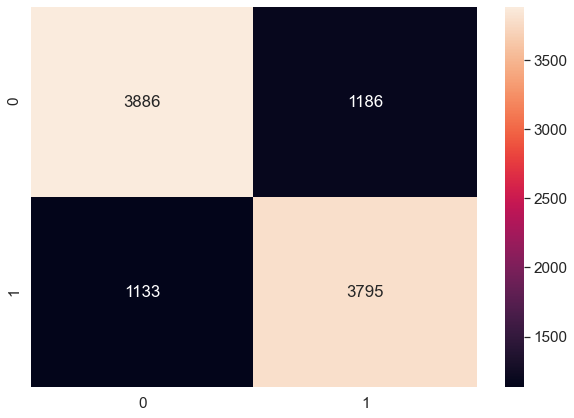

In [15]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [16]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Logistic Regression Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Accuracy: 0.767 (+/- 0.010)


In [17]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(dataset.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,dayofweek,0.032574
1,hour,-0.003600
2,age,-0.149688
3,numscreens,-0.130597
4,minigame,-0.026462
5,used_premium_feature,-0.065907
6,liked,0.010695
7,location,-0.028331
8,Institutions,-0.062195
9,VerifyPhone,0.650341


# Model Tuning

In [18]:
## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 31.68 seconds


(0.7674, {'C': 0.01, 'penalty': 'l2'})

In [19]:
## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 26.49 seconds


(0.767225, {'C': 0.5, 'penalty': 'l2'})

In [20]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identity], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)

In [21]:
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


# CONCLUSION

- Our efforts have given us a model that will label every new user as "highly likely" (or "unlikely")
  to subscribe. We can further validate our results by running our predictions on daily new
  installs, and see whether our accuracy is consistent. From there, we can narrow our marketing
  efforts only to those users "unlikely" to subscribe, and thus increase our subscription rate.
  
  
- The increase in overall subscriptions can measure the benefit of this model to the company.
  Recall that those already likely to subscribe will do so, and, although we can still give them
  offers, we don't have to go all out. On the other hand, users who are likely to leave may convert
  to paid subscribers if we give them an offer they cannot refuse. For example, these offers can
  come in the form of "Ist month free', or "50% off yearly subscriptions. The latter shows that
  great offers can still be structured in a way that brings overall benefit to the company because
  we are locking the user in for an extended period!